In [21]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the datasets
#commodity price dataset
df1=pd.read_csv(r"C:\Users\Admin\Downloads\commodity_prices (1).csv")
#GDP dataset
df2=pd.read_csv(r"C:\Users\Admin\Downloads\gdp_1960_2020 (1).csv")

In [3]:
#inspection of commodity prices dataset
#checking for data type and missing values
df1.shape

df1.dtypes

Year               int64
Cocoa            float64
Coffee           float64
Tea              float64
Crude Oil        float64
Coal             float64
Natural Gas      float64
Banana           float64
Sugar            float64
Orange           float64
Barley           float64
Maize            float64
Sorghum          float64
Rice             float64
Wheat            float64
Beef             float64
Chicken          float64
Lamb             float64
Shrimps          float64
Gold             float64
Platinum         float64
Silver           float64
Cotton           float64
Rubber           float64
Tobacco          float64
Coconut Oil      float64
Groundnut Oil    float64
Palm Oil         float64
Soybean          float64
Logs             float64
Sawnwood         float64
dtype: object

In [4]:
#inspection of dataset on gdp
df2.dtypes
df2.head()

,Year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,5.433000e+11,0.468483
1,1960,2,United Kingdom,Europe,7.323397e+10,0.063149
2,1960,3,France,Europe,6.222548e+10,0.053656
3,1960,4,China,Asia,5.971647e+10,0.051493
4,1960,5,Japan,Asia,4.430734e+10,0.038206


In [5]:
#selecting the gdp of Kenya
df3=df2[df2["country"]=="Kenya"]
df3.head()

,Year,rank,country,state,gdp,gdp_percent
54,1960,55,Kenya,Africa,791265458.0,0.000682
157,1961,55,Kenya,Africa,792959472.0,0.000657
260,1962,55,Kenya,Africa,868111400.0,0.000657
366,1963,56,Kenya,Africa,926589348.0,0.000652
471,1964,56,Kenya,Africa,998759333.0,0.000641


In [6]:
#Dropping unrequired columns in gdp dataset
df4= df3.drop(df3.columns[1], axis=1)
df4.head()

,Year,country,state,gdp,gdp_percent
54,1960,Kenya,Africa,791265458.0,0.000682
157,1961,Kenya,Africa,792959472.0,0.000657
260,1962,Kenya,Africa,868111400.0,0.000657
366,1963,Kenya,Africa,926589348.0,0.000652
471,1964,Kenya,Africa,998759333.0,0.000641


In [7]:
#combining two datasets, Kenyas GDP and commodity prices
df=pd.merge(df1, df4, on='Year', how='inner')
#inspecting merged dataset
df.head()

,Year,Cocoa,Coffee,Tea,Crude Oil,Coal,Natural Gas,Banana,Sugar,Orange,...,Coconut Oil,Groundnut Oil,Palm Oil,Soybean,Logs,Sawnwood,country,state,gdp,gdp_percent
0,1960,0.59,0.92,1.03,1.63,NaN,0.14,0.14,0.07,0.13,...,312.33,327.00,224.42,223.92,31.94,149.17,Kenya,Africa,791265458.0,0.000682
1,1961,0.48,0.90,0.95,1.57,NaN,0.15,0.13,0.06,0.13,...,253.42,330.25,228.42,287.33,33.06,151.98,Kenya,Africa,792959472.0,0.000657
2,1962,0.46,0.83,0.97,1.52,NaN,0.16,0.13,0.06,0.11,...,251.22,274.34,216.24,227.00,36.39,160.06,Kenya,Africa,868111400.0,0.000657
3,1963,0.55,0.81,0.95,1.50,NaN,0.16,0.14,0.18,0.09,...,286.33,268.50,222.39,223.58,35.49,157.85,Kenya,Africa,926589348.0,0.000652
4,1964,0.51,1.01,0.93,1.45,NaN,0.15,0.17,0.13,0.08,...,296.48,315.38,239.45,233.00,30.26,144.83,Kenya,Africa,998759333.0,0.000641


In [8]:
#dropping null values
df.dropna()

,Year,Cocoa,Coffee,Tea,Crude Oil,Coal,Natural Gas,Banana,Sugar,Orange,...,Coconut Oil,Groundnut Oil,Palm Oil,Soybean,Logs,Sawnwood,country,state,gdp,gdp_percent
11,1971,0.54,0.99,0.85,1.69,8.68,0.18,0.14,0.10,0.15,...,365.53,440.62,260.94,303.75,43.27,175.72,Kenya,Africa,1.778391e+09,0.000573
12,1972,0.64,1.11,0.78,1.82,9.60,0.19,0.14,0.16,0.15,...,234.06,425.93,217.26,240.58,41.12,170.93,Kenya,Africa,2.107279e+09,0.000590
13,1973,1.13,1.37,0.79,2.81,11.48,0.21,0.15,0.21,0.16,...,513.00,546.17,377.54,436.00,68.03,223.53,Kenya,Africa,2.508998e+09,0.000575
14,1974,1.56,1.45,1.09,10.97,16.89,0.29,0.18,0.65,0.18,...,997.58,1076.89,669.05,832.17,81.66,246.83,Kenya,Africa,2.969942e+09,0.000590
15,1975,1.25,1.44,1.14,10.43,26.84,0.43,0.22,0.45,0.23,...,393.50,857.50,434.17,563.33,67.51,223.44,Kenya,Africa,3.259345e+09,0.000580
16,1976,2.05,3.15,1.19,11.63,27.16,0.58,0.26,0.25,0.22,...,418.50,712.83,406.53,438.33,92.02,263.55,Kenya,Africa,3.474542e+09,0.000568
17,1977,3.79,5.17,1.95,12.57,28.68,0.79,0.27,0.18,0.25,...,578.17,852.75,530.03,580.25,92.57,264.98,Kenya,Africa,4.494379e+09,0.000650
18,1978,3.40,3.59,1.41,12.92,29.06,0.91,0.29,0.17,0.30,...,683.21,1079.17,600.33,607.00,97.36,272.28,Kenya,Africa,5.303735e+09,0.000651
19,1979,3.29,3.83,1.51,30.96,30.89,1.18,0.33,0.21,0.40,...,984.50,888.67,653.83,662.18,170.04,365.93,Kenya,Africa,6.234391e+09,0.000659
20,1980,2.60,3.47,1.66,36.87,40.14,1.59,0.38,0.63,0.40,...,673.83,858.75,583.69,597.61,195.51,396.20,Kenya,Africa,7.265315e+09,0.000680


Exploratory Data Analysis and Visualization

Is there any correlation between Tea and Sugar?

In [9]:
#checking for correlation between sugar and tea
correlation = df['Tea'].corr(df['Sugar'])
correlation

0.5394474618000025

There is moderate correlation between Tea and Sugar

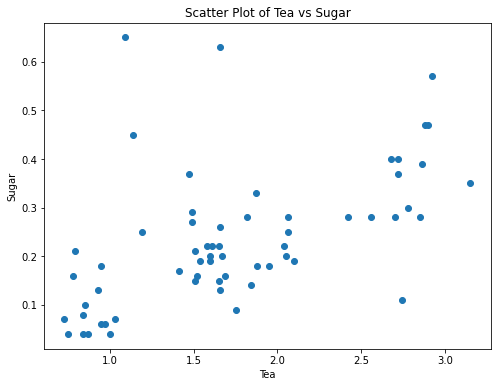

In [10]:
#scatter plot of Tea vs Sugar
plt.figure(figsize=(8, 6))
plt.scatter(df['Tea'], df['Sugar'])

# Adding labels and title
plt.xlabel('Tea')
plt.ylabel('Sugar')
plt.title('Scatter Plot of Tea vs Sugar')

# Showing the plot
plt.show()

In [11]:
#correlation matrix 
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Year,Cocoa,Coffee,Tea,Crude Oil,Coal,Natural Gas,Banana,Sugar,Orange,...,Rubber,Tobacco,Coconut Oil,Groundnut Oil,Palm Oil,Soybean,Logs,Sawnwood,gdp,gdp_percent
Year,1.000000,0.578825,0.572925,0.866904,0.792901,0.746389,0.722106,0.932280,0.497502,0.901754,...,0.682090,0.922593,0.688420,0.835142,0.713586,0.749917,0.879801,0.922955,0.811692,0.208686
Cocoa,0.578825,1.000000,0.862955,0.725152,0.641234,0.527081,0.381501,0.608285,0.534837,0.593499,...,0.609464,0.651845,0.696385,0.692655,0.770716,0.742231,0.562603,0.524180,0.520262,0.341356
Coffee,0.572925,0.862955,1.000000,0.733058,0.622240,0.543334,0.351536,0.597663,0.536773,0.556144,...,0.679593,0.662381,0.688500,0.657976,0.761620,0.714829,0.645352,0.588994,0.457516,0.195927
Tea,0.866904,0.725152,0.733058,1.000000,0.823861,0.811142,0.554066,0.911236,0.539447,0.811135,...,0.749121,0.944187,0.810084,0.839762,0.813580,0.824770,0.812118,0.811425,0.798352,0.361370
Crude Oil,0.792901,0.641234,0.622240,0.823861,1.000000,0.903779,0.715460,0.831668,0.602180,0.882128,...,0.896531,0.797841,0.748589,0.886205,0.854182,0.884478,0.778584,0.811804,0.711805,0.297067
Coal,0.746389,0.527081,0.543334,0.811142,0.903779,1.000000,0.543013,0.844815,0.492167,0.834551,...,0.862953,0.787889,0.732000,0.854954,0.809422,0.852543,0.735628,0.744728,0.725952,0.462752
Natural Gas,0.722106,0.381501,0.351536,0.554066,0.715460,0.543013,1.000000,0.576798,0.269876,0.842464,...,0.568636,0.557905,0.438219,0.644727,0.540810,0.574189,0.625598,0.712261,0.393705,-0.127188
Banana,0.932280,0.608285,0.597663,0.911236,0.831668,0.844815,0.576798,1.000000,0.537412,0.849608,...,0.743049,0.947675,0.746818,0.844560,0.742831,0.783921,0.832955,0.853272,0.926577,0.463518
Sugar,0.497502,0.534837,0.536773,0.539447,0.602180,0.492167,0.269876,0.537412,1.000000,0.520045,...,0.651718,0.523730,0.617272,0.656862,0.698828,0.719612,0.584281,0.550153,0.431323,0.192415
Orange,0.901754,0.593499,0.556144,0.811135,0.882128,0.834551,0.842464,0.849608,0.520045,1.000000,...,0.801419,0.835752,0.688405,0.852781,0.765877,0.804060,0.838185,0.892920,0.669473,0.101865


there is a strong correlation between agricultural commodities and crude oil
there is a strong correlation between agricultural commodities
there is also strong correlation between Tea and Kenyas GDP

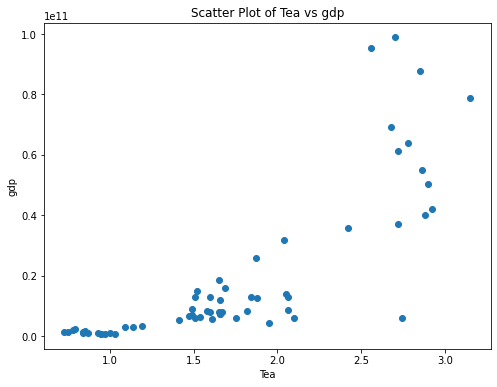

In [12]:
#scatter plot of Tea vs Kenya's GDP
plt.figure(figsize=(8, 6))
plt.scatter(df['Tea'], df['gdp'])

# Adding labels and title
plt.xlabel('Tea')
plt.ylabel('gdp')
plt.title('Scatter Plot of Tea vs gdp')

# Showing the plot
plt.show()

Almost linear relationship

Visualization 

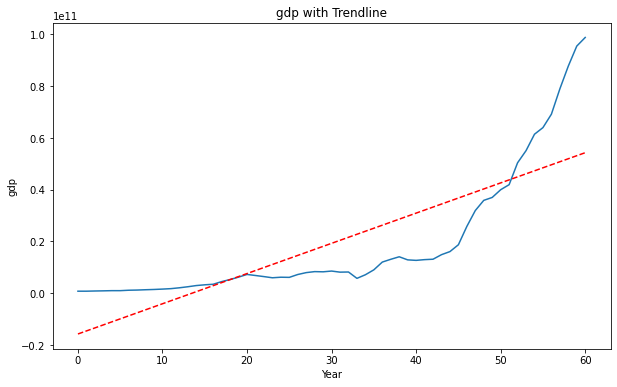

In [13]:
#trendline of Kenya's GDP
# Plot the data
plt.figure(figsize=(10, 6))
df['gdp'].plot()

# Add trendline
coefficients = np.polyfit(range(len(df)), df['gdp'], 1)
trend_line = np.poly1d(coefficients)
plt.plot(range(len(df)), trend_line(range(len(df))), color='red', linestyle='--')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('gdp')
plt.title('gdp with Trendline')
plt.show()

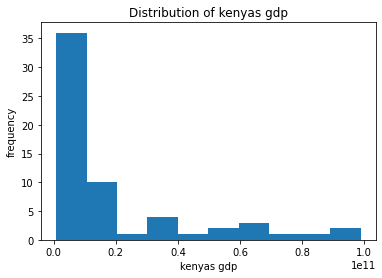

In [14]:
#distribution of kenya gdp
plt.hist(df['gdp'])
plt.xlabel("kenyas gdp")
plt.ylabel("frequency")
plt.title("Distribution of kenyas gdp");

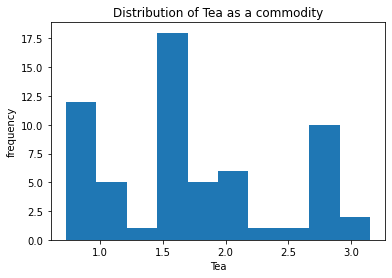

In [15]:
#distribution of Tea
plt.hist(df['Tea'])
plt.xlabel("Tea")
plt.ylabel("frequency")
plt.title("Distribution of Tea as a commodity");

Prices of tea are normally distributed

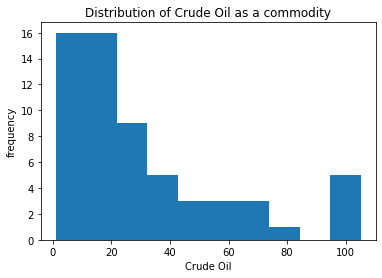

In [16]:
#distribution of Tea
plt.hist(df['Crude Oil'])
plt.xlabel("Crude Oil")
plt.ylabel("frequency")
plt.title("Distribution of Crude Oil as a commodity");

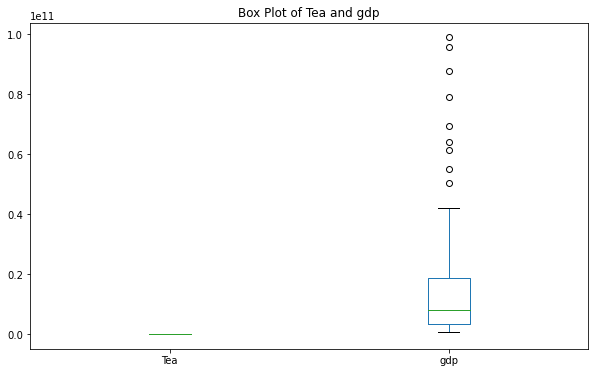

In [17]:
# Create the box plot
plt.figure(figsize=(10, 6))
df.boxplot(column=['Tea', 'gdp'], grid=False)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Box Plot of Tea and gdp')

# Show the plot
plt.show();

Model Building
Exploring linear relationship between Kenya's GDP as dependent variable and Tea, coffee and Crude oil as independent variables
How does Tea prices affect Kenyas GDP?
How does Coffee Prices affect Kenyas GDP?
How does crude oil prices affect Kenyas GDP?

Linear regression model


In [19]:
X=df[["Tea","Crude Oil"]]
y=df["gdp"]

In [22]:
 #Instantiate the model
lr = LinearRegression()

In [23]:
#Fitting the model
lr.fit(X,y)

LinearRegression()

In [27]:
# Evaluate the model
y_pred = lr.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Coefficients: [2.45187403e+10 1.46812999e+08]
Intercept: -27750286321.145576
Mean Squared Error: 226772507671028826112.00
R-squared: 0.65


Overall, these results suggest that the regression model has some predictive power, as indicated by the R-squared value of 0.65, but the large coefficients and intercept, as well as the extremely high MSE, suggest that the model may not be a good fit for the data. Further investigation and model refinement may be necessary to improve the performance of the regression model